In [1]:
## all imports
from IPython.display import HTML
import chardet
import io
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
from time import sleep
import requests
import operator
import socket
import _pickle
import math
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
import json
#import numpy.polynomial.polynomial as poly

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")
import matplotlib.patches as mpatches

from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time
from datetime import datetime

import matplotlib.dates as mdates

#from secret import *

### START GRAPHING

In [2]:
if os.path.isfile("Master_File_File.csv"):
    filepath_master = "Master_File_File.csv"
    print ("Master_File_.csv loading from file")
    
else:
    filepath = "https://docs.google.com/spreadsheets/d/1pfiz1CjeaS36L5CZIGqcXByj9qGpxKztXcsQ8o-1rOQ/pub?output=csv"
    print ("afl.com.au loading from the internet")



Master_File_.csv loading from file


In [3]:
df= pd.read_csv(filepath_master)
print ("done")

done


### CREATE A BASE/UNMANIPULATED DF FOR LATER

In [4]:
df_base = df

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = (20)

### USEFUL LINKS

https://matplotlib.org/users/legend_guide.html

http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_markersize

https://matplotlib.org/users/colors.html

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

https://github.com/tomwyb/code1161base/blob/master/.ipynb_checkpoints/aircon-checkpoint.ipynb

### SORT  INPUT % BY TEAM IN MATCH

In [6]:
def perc_data_byteam(basetype, comparison):
    datatype = basetype + '_PERC_OF_' + comparison

    def perc_(x):
        percentage = (x[basetype]/x[comparison])*100
        return float(("%.2f" % round(percentage,2)))


    df[datatype] = df.apply(perc_, axis=1)
    return df[datatype]


### SORT  INPUT % BY MATCH

In [7]:
def perc_data_bymatch(basetype):
    datatype = basetype + '_PERC_RELATIVE_TO_OPPONENT'
    match_totals = df[[basetype]].groupby(df.MATCH_ID).sum()

    def _percentage(x):
        current_match_id = x.MATCH_ID
        total_row = match_totals.loc[current_match_id]
        total_row_output = total_row[basetype]
        percentage = (x[basetype]/ total_row_output)*100
        return float(("%.2f" % round(percentage,2)))

    df[datatype] = df.apply(_percentage, axis=1)
    return df[datatype]

### TOTALS FUNCTION (RAIN OPTION)

def make_totals(year,y_axis, rain_data):  
    
    x_axis = 'PLOT_TIME'
    new_y_axis = y_axis + '_TOTAL'
    match_totals = df[[y_axis]].groupby(df.MATCH_ID).sum()
    #print (match_totals)
    
    def _total(x):
        current_match_id = x.MATCH_ID
        total_row = match_totals.loc[current_match_id]
        total_row_output = total_row[y_axis]
        return int (total_row_output)


    df[new_y_axis] = df.apply(_total, axis=1)
    
    y_axis = new_y_axis
    
    temp_df = df

    
    
    if (teamname == 'All') & (year == 'All') :
        temp_df = temp_df[temp_df.HOME == True]
        label = 'this'
    
    elif (teamname == 'All') & (year != 'All') :
        temp_df = temp_df[temp_df.YEAR == int(year)]  
        label = 'this'

    elif(teamname != 'All') & (year == 'All') :
        temp_df = temp_df[temp_df.TEAMNAME == teamname] 
        label = 'this'
        
    else:
        temp_df = temp_df[(temp_df.TEAMNAME == teamname) & (temp_df.YEAR == int(year))]
        label = 'this'
    
    
    
    
    
    
    size = 3.2
    text_size = 10
    alpha_level = 0.8
    
    
    if rain_data == 'No_Rain':
        x1 = temp_df[x_axis]
        y1 = temp_df[y_axis]
        
        return plot_puretotals_graph (x1, y1, year, x_axis, y_axis, size, text_size, alpha_level)
        
    elif rain_data == 'Rain':
        df_raindata = temp_df[temp_df.RAIN != "No Data"]
        df_raindata.RAIN = df_raindata.RAIN.astype(float)
        no_rain = df_raindata[df_raindata.RAIN == 0.0]
        rain = df_raindata[df_raindata.RAIN > 0.0]
        
        x1 = rain[x_axis]
        x2 = no_rain[x_axis]
        y1 = rain[y_axis]
        y2 = no_rain[y_axis]
        
        x_axis = 'YEARS'
        
        return plot_raintotals_graph (x1, x2, y1, y2, year, x_axis, y_axis, size, text_size, alpha_level)
        
        
    else:
        print ('error in rain input')
        
        

def plot_raintotals_graph (x1, x2, y1, y2, year, x_axis, y_axis, size, text_size, alpha_level):

    

    rain_color = 'navy'
    rain_label = 'RAIN'
    norain_color = 'lightblue'
    norain_label = 'NO RAIN'
    label = y_axis + ' v ' + x_axis + ' ' + 'SHOWING RAIN STATUS FOR ALL GAMES (2001-2017)'

    
    plt.plot_date(x1, y1, markersize= size, markerfacecolor = rain_color, label=rain_label, alpha = alpha_level)
    plt.plot_date(x2, y2, markersize= size, markerfacecolor = norain_color, label = norain_label, alpha = alpha_level)

          
 
    coefs = np.polyfit(x1, y1, 4)
    ffit = np.polyval(coefs, np.sort(x1))
    plt.plot(np.sort(x1), ffit,rain_color)

    coefs = np.polyfit(x2, y2, 4)
    ffit = np.polyval(coefs, np.sort(x2))
    plt.plot(np.sort(x2), ffit,norain_color)
    
    plt.title(label)
    plt.xlabel(x_axis, fontsize = text_size)
    plt.ylabel(y_axis, fontsize = text_size)


    plt.legend(loc='upper left', prop={"size" : text_size});
    plt.show()
    

def plot_puretotals_graph (x1, y1, year, x_axis, y_axis, size, text_size, alpha_level):


    totals_color = 'navy'
    totals_label = 'TOTALS'
    label = y_axis + ' v ' + x_axis + ' ' + 'FOR ALL GAMES (2001-2017)'

    
    plt.plot_date(x1, y1, markersize= size, markerfacecolor = totals_color, label=totals_label, alpha = alpha_level)
    

          
    coefs = np.polyfit(x1, y1, 4)
    ffit = np.polyval(coefs, np.sort(x1))
    plt.plot(np.sort(x1), ffit,rain_color)


    
    plt.title(label)
    plt.xlabel(x_axis, fontsize = text_size)
    plt.ylabel(y_axis, fontsize = text_size)


    plt.legend(loc='upper left', prop={"size" : text_size});
    plt.show()  
    

def make_graphfunction(year, teamname, comparison_data, input_data):  
    

    if comparison_data == 'RAIN' or input_data == 'RAIN':
        clean_df = df[df.RAIN != "No Data"]
        clean_df.RAIN = clean_df.RAIN.astype(float)
        
    else:
        clean_df = df
    
    ### no line of best fit 
    if (teamname == 'All') & (year == 'All') :
        data_list = axis(clean_df,comparison_data, input_data)
        totals_list = 'No_Totals_List'
        label = input_data + ' v ' + comparison_data + ' ' + "FOR ALL WINNING AND LOSING TEAMS (2001-2017)" 
        time_size = 5
        data_size = 10
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)

    ### no line of best fit    
    elif (teamname == 'All') & (year != 'All') :
        data_list = axis(clean_df[clean_df.YEAR == int(year)] , comparison_data, input_data)
        totals_list = 'No_Totals_List'
        time_size = 7
        data_size = 50
        label = input_data + ' v ' + comparison_data + ' ' + "FOR ALL WINNING AND LOSING TEAMS"  + ' ' +  year
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)
    
    
    ### need a line of best fit
    elif(teamname != 'All') & (year == 'All') :
        data_list = axis(clean_df[clean_df.TEAMNAME == teamname] ,comparison_data, input_data)
        totals_list = axis(clean_df,comparison_data, input_data)
        time_size = 7
        data_size = 50
        label = input_data + ' v ' + comparison_data + ' ' + "FOR " + teamname + ' ' +  '(2001-2017)'
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)

        
    ### need a line of best fit
    else:
        data_list = axis(clean_df[(clean_df.TEAMNAME == teamname) & (clean_df.YEAR == int(year))] , comparison_data, input_data)
        totals_list = axis(clean_df[clean_df.YEAR == int(year)],comparison_data, input_data)
        time_size = 10
        data_size = 75
        label = input_data + ' v ' + comparison_data + ' ' + "FOR " + teamname + ' WINNING AND LOSING' + year
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)
        
        
        

In [114]:
def axis(temp_df,comparison_data, input_data):

    df_win = temp_df[temp_df.RESULT == "Win"]
    df_lose = temp_df[temp_df.RESULT == "Lose"]
    
    x1 = df_win[comparison_data]
    x2 = df_lose[comparison_data]
    y1 = df_win[input_data]
    y2= df_lose[input_data]
    return x1, x2, y1, y2

In [115]:
def best_fit (x1, y1,colour):  
    coefs = np.polyfit(x1, y1, 4)
    ffit = np.polyval(coefs, np.sort(x1))
    return plt.plot(np.sort(x1), ffit,colour)

In [116]:
def plot_date (x, y, sizes, colors, labels, alphas):
    return plt.plot_date(x, y, markersize= sizes, markerfacecolor = colors, label= labels, alpha = alphas)

In [120]:
def plot_scatter (x, y, sizes, colors, labels, alphas):
    plt1 = plt
    return plt1.scatter(x, y, s= sizes, color = colors, label= labels, alpha = alphas)

### WINLOSS FUNCTION

In [ ]:
def make_totals(year,y_axis, rain_data):  
    
    x_axis = 'PLOT_TIME'
    new_y_axis = y_axis + '_TOTAL'
    match_totals = df[[y_axis]].groupby(df.MATCH_ID).sum()
    #print (match_totals)
    
    def _total(x):
        current_match_id = x.MATCH_ID
        total_row = match_totals.loc[current_match_id]
        total_row_output = total_row[y_axis]
        return int (total_row_output)


    df[new_y_axis] = df.apply(_total, axis=1)
    
    y_axis = new_y_axis
    
    temp_df = df

    
    
    if (teamname == 'All') & (year == 'All') :
        temp_df = temp_df[temp_df.HOME == True]
        label = 'this'
    
    elif (teamname == 'All') & (year != 'All') :
        temp_df = temp_df[temp_df.YEAR == int(year)]  
        label = 'this'

    elif(teamname != 'All') & (year == 'All') :
        temp_df = temp_df[temp_df.TEAMNAME == teamname] 
        label = 'this'
        
    else:
        temp_df = temp_df[(temp_df.TEAMNAME == teamname) & (temp_df.YEAR == int(year))]
        label = 'this'
    
    
    
    
    
    
    size = 3.2
    text_size = 10
    alpha_level = 0.8
    
    
    if rain_data == 'No_Rain':
        x1 = temp_df[x_axis]
        y1 = temp_df[y_axis]
        
        return plot_puretotals_graph (x1, y1, year, x_axis, y_axis, size, text_size, alpha_level)
        
    elif rain_data == 'Rain':
        df_raindata = temp_df[temp_df.RAIN != "No Data"]
        df_raindata.RAIN = df_raindata.RAIN.astype(float)
        no_rain = df_raindata[df_raindata.RAIN == 0.0]
        rain = df_raindata[df_raindata.RAIN > 0.0]
        
        x1 = rain[x_axis]
        x2 = no_rain[x_axis]
        y1 = rain[y_axis]
        y2 = no_rain[y_axis]
        
        x_axis = 'YEARS'
        
        return plot_raintotals_graph (x1, x2, y1, y2, year, x_axis, y_axis, size, text_size, alpha_level)
        
        
    else:
        print ('error in rain input')
        
        

In [ ]:
def base_graphs (x_axis, rain): 
    x_axis = 'time'
    rain_data = rain

    perc_data_bymatch(x_axis)

    make_totals(year, input_data, rain_data)
    make_winloss(year, teamname, x_axis, input_data)

### BREAK

### UPDATE SO THAT TOTALS WORKS, THEN  MAKE RAIN FUNCTION WORK, LINE OF BEST FIT LEGEND, TIGHTEN TITLES AND DO D3 MATPLOTlib

In [112]:
def make_graphfunction(year, teamname, comparison_data, input_data):  
    

    if comparison_data == 'RAIN' or input_data == 'RAIN':
        clean_df = df[df.RAIN != "No Data"]
        clean_df.RAIN = clean_df.RAIN.astype(float)
        
    else:
        clean_df = df
    
    ### no line of best fit 
    if (teamname == 'All') & (year == 'All') :
        data_list = axis(clean_df,comparison_data, input_data)
        totals_list = 'No_Totals_List'
        label = input_data + ' v ' + comparison_data + ' ' + "FOR ALL WINNING AND LOSING TEAMS (2001-2017)" 
        time_size = 5
        data_size = 10
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)

    ### no line of best fit    
    elif (teamname == 'All') & (year != 'All') :
        data_list = axis(clean_df[clean_df.YEAR == int(year)] , comparison_data, input_data)
        totals_list = 'No_Totals_List'
        time_size = 7
        data_size = 50
        label = input_data + ' v ' + comparison_data + ' ' + "FOR ALL WINNING AND LOSING TEAMS"  + ' ' +  year
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)
    
    
    ### need a line of best fit
    elif(teamname != 'All') & (year == 'All') :
        data_list = axis(clean_df[clean_df.TEAMNAME == teamname] ,comparison_data, input_data)
        totals_list = axis(clean_df,comparison_data, input_data)
        time_size = 7
        data_size = 50
        label = input_data + ' v ' + comparison_data + ' ' + "FOR " + teamname + ' ' +  '(2001-2017)'
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)

        
    ### need a line of best fit
    else:
        data_list = axis(clean_df[(clean_df.TEAMNAME == teamname) & (clean_df.YEAR == int(year))] , comparison_data, input_data)
        totals_list = axis(clean_df[clean_df.YEAR == int(year)],comparison_data, input_data)
        time_size = 10
        data_size = 75
        label = input_data + ' v ' + comparison_data + ' ' + "FOR " + teamname + ' WINNING AND LOSING' + year
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)
        
        
        

In [ ]:
make_graphfunction(year, teamname, comparison_data, input_data)

## BREAK

In [127]:
def plot_graph (data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size):
    
    ### passing in two x and y's, if match totals, we need to use a different color and only 1 x and y
    x1 = data_list[0]
    x2 = data_list[1]
    y1 = data_list[2]
    y2= data_list[3]
        
    color_01 = 'navy'
    label_01 = 'WINNING TEAM'
    color_02 = 'orange'
    label_02 = 'LOSING TEAM'
    text_size = 10
    alpha = 0.6

    
    if comparison_data == 'PLOT_TIME':
        plot_date (x1, y1, time_size, color_01, label_01, alpha)
        plot_date (x2, y2, time_size, color_02, label_02, alpha)
        comparison_data = 'YEARS'
        
    elif input_data == 'PLOT_TIME':
        print ('Time must be on x-axis')
          
    else:
        plot_scatter (x1, y1, data_size, color_01, label_01, alpha)
        plot_scatter (x2, y2, data_size, color_02, label_02, alpha)
                    
      
    #if  input_data != 'RAIN':

        
    #else: 
        #print ('')
        
    plt.grid()
    best_fit (x1, y1, color_01)
    best_fit (x2, y2, color_02)
       
        
    if (teamname != 'All') & (totals_list != 'No_Totals_List') :
       
        print (teamname)
        line_x1 = totals_list[0]
        line_x2 = totals_list[1]
        line_y1 = totals_list[2]
        line_y2 = totals_list[3]
        color_03 = 'blue'
        color_04 = 'red'
        
        best_fit (line_x1, line_y1, color_03)
        best_fit (line_x2, line_y2, color_04)
        
    else: 
        print ('')
    


    plt.title(label)
    plt.xlabel(comparison_data, fontsize = text_size)
    plt.ylabel(input_data, fontsize = text_size)
    #plt.xticks(np.arange(min(x1), max(x1)+10, 1.0))
    #https://matplotlib.org/examples/ticks_and_spines/ticklabels_demo_rotation.html


    plt.legend(loc='upper left', prop={"size" : text_size});
    plt.show()
    

### SET GRAPHS TO PRINT

In [107]:
def percentage_graphs (comparison_data): 
    
    if comparison_data != input_data:


        perc_data_bymatch(comparison_data)
        perc_data_byteam(comparison_data, input_data)


        make_graphfunction(year, teamname, comparison_data, input_data)
        make_graphfunction(year, teamname, 'PLOT_TIME', comparison_data)


        ### ONLY RUN GRAPHS IF THEY ARE % OF TOTALPOSSESSIONS
        if (input_data == 'TOTALPOSSESSIONS' and (comparison_data == 'CONTESTEDPOSSESSIONS' or comparison_data == 'UNCONTESTEDPOSSESSIONS'
            or comparison_data == 'KICKS' or comparison_data == 'HANDBALLS')) or (input_data == 'MARKS' and (comparison_data == 'CONTESTEDMARKS'
            or comparison_data == 'MARKSINSIDE50')) or (input_data == 'TACKLES' and (comparison_data == 'TACKLESINSIDE50')):


            make_graphfunction(year, teamname, 'PLOT_TIME', comparison_data + '_PERC_OF_'  + input_data)
            make_graphfunction(year, teamname, comparison_data + '_PERC_OF_'  + input_data, input_data )

        else: pass


        make_graphfunction(year, teamname, comparison_data + '_PERC_RELATIVE_TO_OPPONENT', input_data)
        
    else: pass
    


###  INPUT DATA (INPUT DATA, TEAM, YEAR, RAIN)

In [48]:
Rain_List = ['Rain', 'No_Rain']

Team_List = ['All', 'GWS Giants', 'Port Adelaide', 'Richmond', 'Hawthorn', 'Melbourne',
           'Collingwood', 'St Kilda', 'Gold Coast Suns', 'Carlton',
           'Geelong Cats', 'Western Bulldogs', 'West Coast Eagles',
           'Adelaide Crows', 'North Melbourne', 'Essendon', 'Fremantle',
           'Sydney Swans', 'Brisbane Lions']

Year_List = ['All', '2001', '2002', '2003', '2004, 2005', '2006', '2007', '2008', '2009', '2010', 
             '2011', '2012', '2013', '2014', '2015', '2016', '2017']
Data_List = ['TOTALPOSSESSIONS']
Data_List_2 = ['TOTALPOSSESSIONS', 'CONTESTEDPOSSESSIONS', 'UNCONTESTEDPOSSESSIONS','DISPOSALS', 'DISPOSALEFFICIENCY', 
            'KICKS','HANDBALLS','MARKS', 'CONTESTEDMARKS', 'MARKSINSIDE50', 'TACKLES', 'TACKLESINSIDE50', 
             'CENTRECLEARANCES', 'INSIDE50S','ONEPERCENTERS', 'REBOUND50S','STOPPAGECLEARANCES', 'TOTALCLEARANCES', 
             'CROWD']

In [129]:
teamname = Team_List[3]
year = Year_List[0]
input_data = Data_List[0]
rain_data = Rain_List[0]


## could sort by venue

## when its year add in more ticks

### add in the overall league trend line as different colour- add additional labels- this is just simply running the
## same script when we do all but within a team one- as in when we change say a team one we still want to keep one running
## which just shows all then we can filter that- if its team we just look at team if its team and year we keep all for
## team but filter down by year, if its year, we just filter dowm by year but keep team- easy- its just in the first one
## we do- this can then be applied to all match totals if needed too- but this is the big one to get working!!!! go do it

### sort the totals by team playing- not just home team, sort all by home team, if team give, sort by teamname

## set line of best fit as a function

In [50]:
print ('yes234')

yes234


### TOTALPOSSESSIONS

Richmond


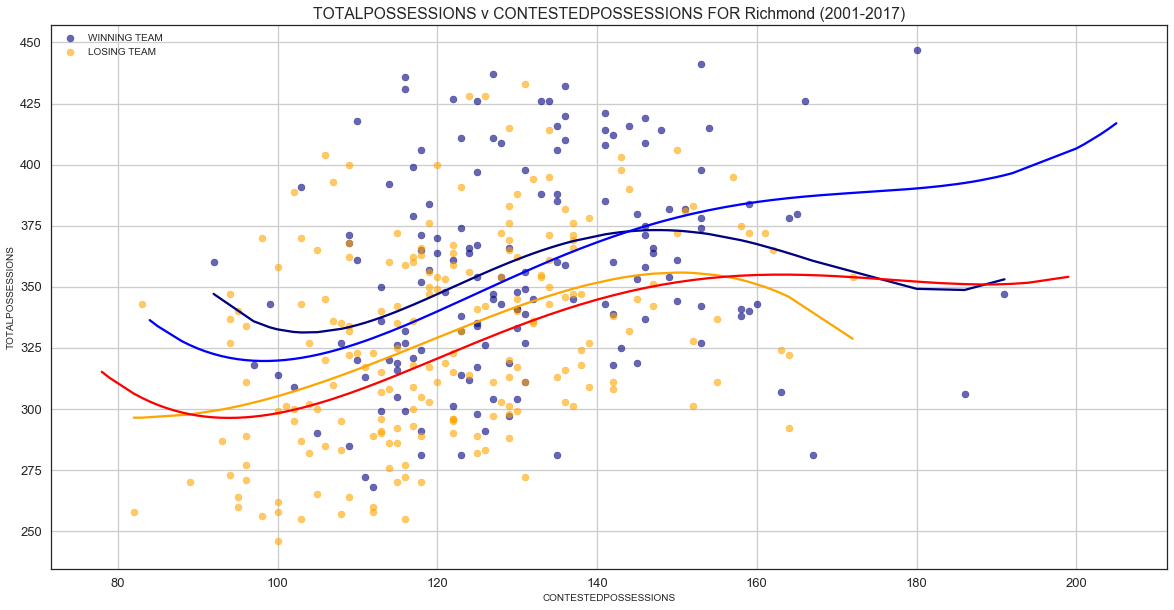

Richmond


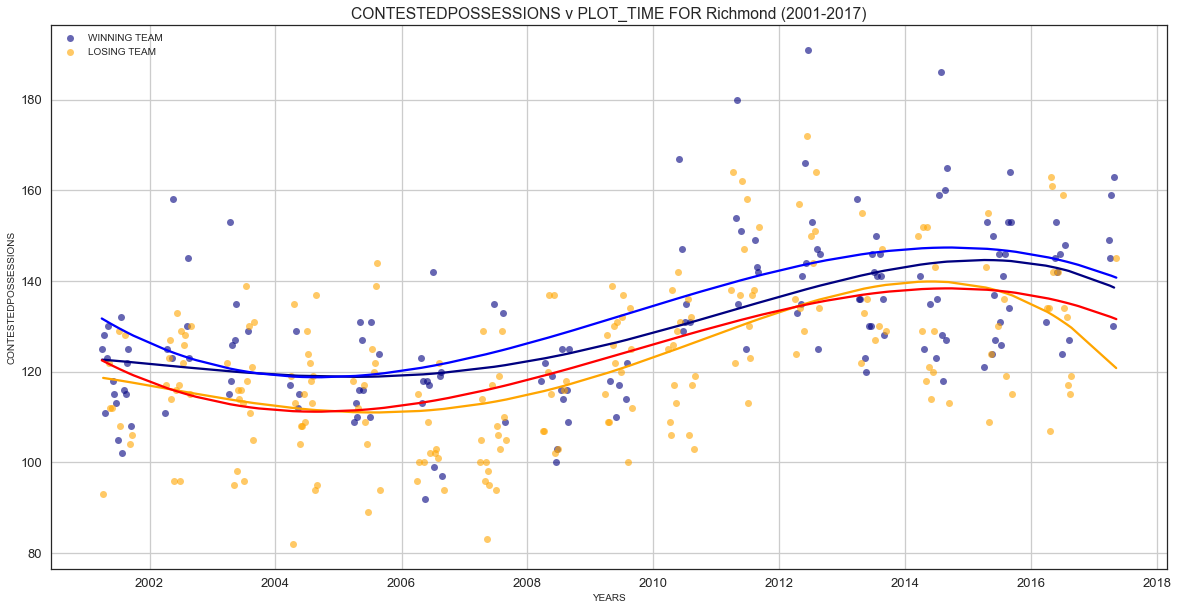

Richmond


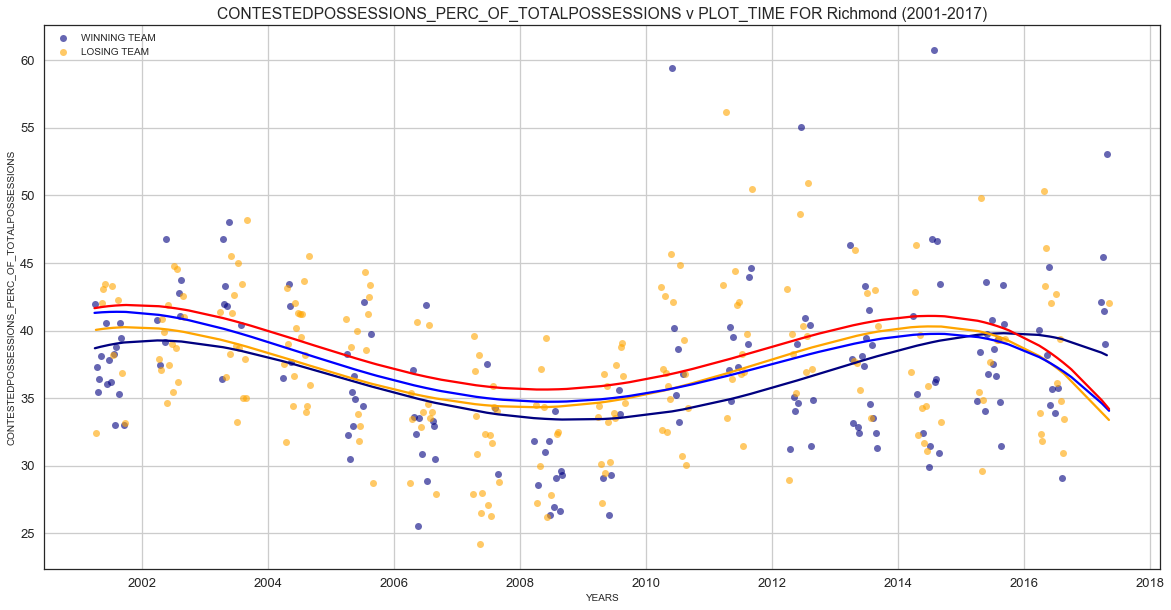

Richmond


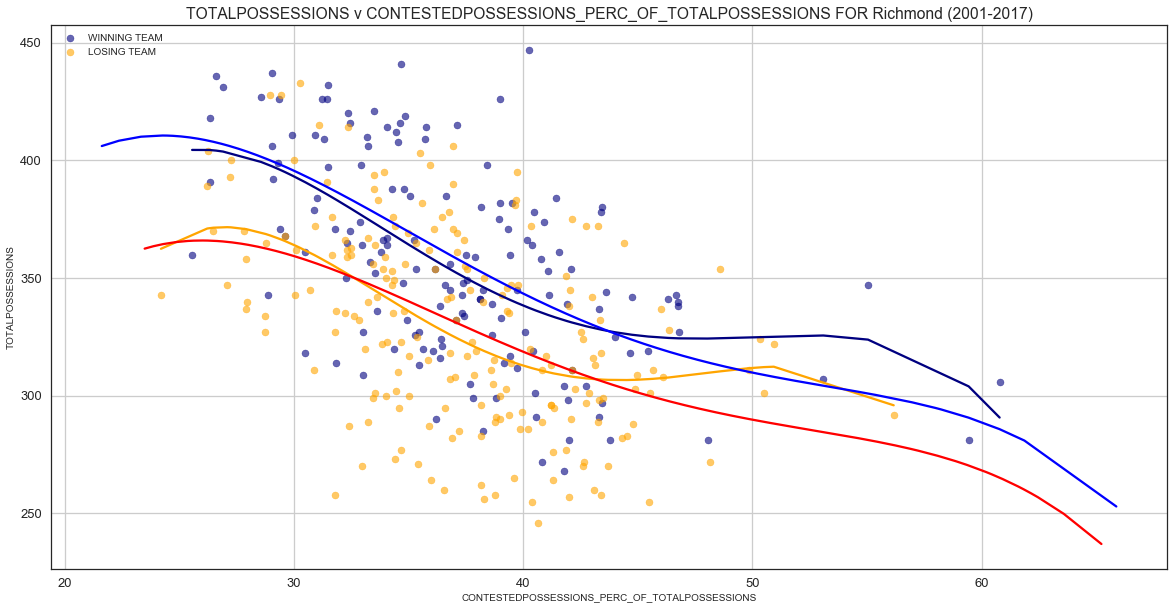

Richmond


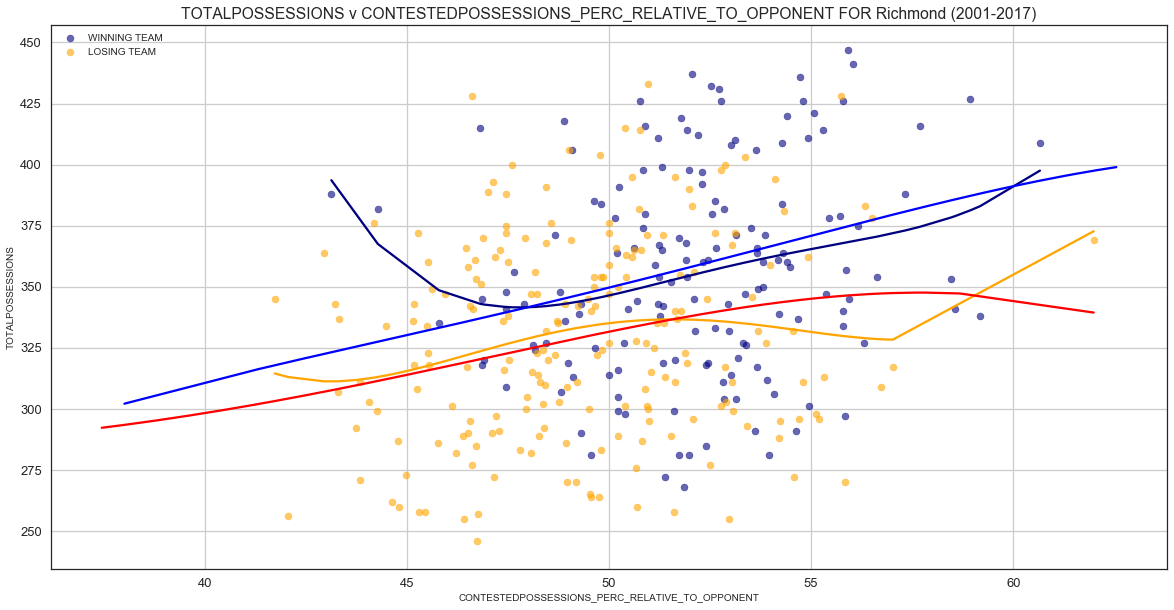

In [130]:
#base_graphs (year, teamname,input_data, rain_data)


## CREATE INPUT GRAPHS
#for i in Data_List_2:
    #print (i)
    #percentage_graphs(i)
    
percentage_graphs ('CONTESTEDPOSSESSIONS')

#print ('yes2')

### END